In [1]:
import sys
import pathlib
sys.path.append(str(pathlib.Path().resolve().parent))

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ta.trend import ema_indicator

from utils.feature_enginner import FeatureEngineer
from utils.data_loader import DataLoader

Loading BokehJS ...

In [3]:
df = DataLoader.load_data("../data/3600/ethusd/2021-01-01.csv")
df = df[:len(df)//2]
print(df.head())

                       Open    High     Low   Close    Volume
Date                                                         
2021-01-01 00:00:00  734.21  734.28  723.79  731.63  3015.608
2021-01-01 01:00:00  731.42  739.26  731.42  736.66   912.377
2021-01-01 02:00:00  737.14  737.46  725.51  727.42  4502.349
2021-01-01 03:00:00  727.17  743.01  726.56  737.75  2895.758
2021-01-01 04:00:00  737.83  741.25  735.99  740.64  3599.793


In [4]:
fe = FeatureEngineer(df, None)
features = fe.entire_features["train"]
normalized_features = fe.entire_normalized_features["train"]

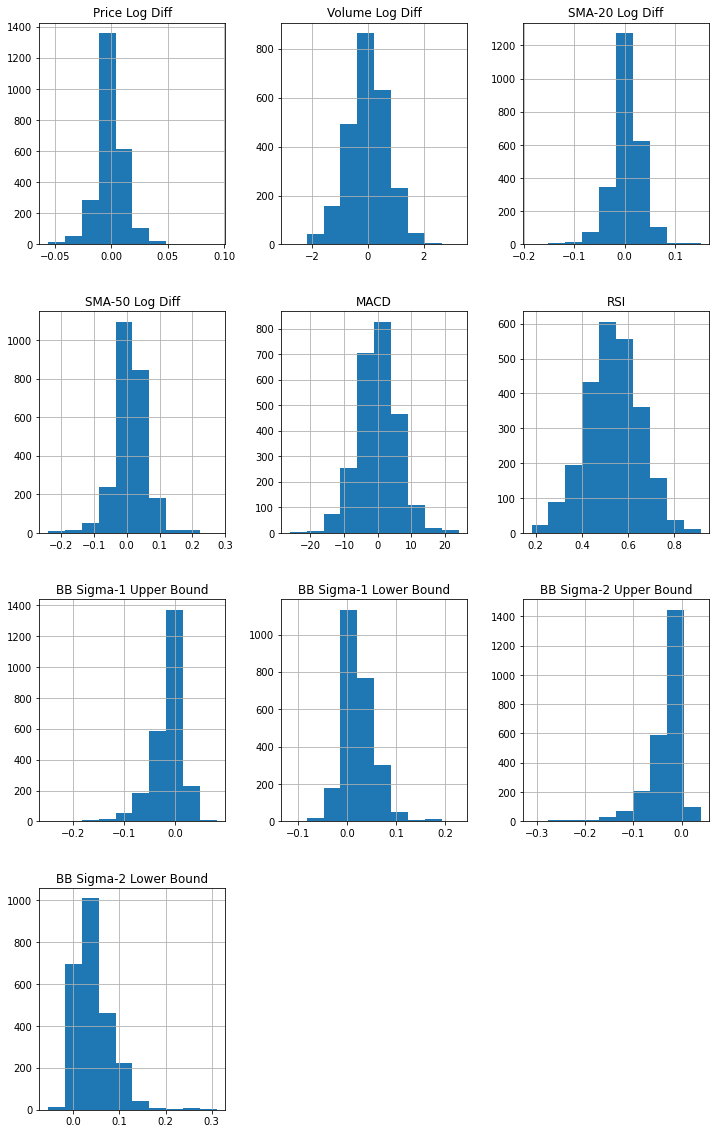

In [5]:
_ = features.hist(figsize=(12, 20))